<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
* X6 = the repayment status in September, 2005; 
* X7 = the repayment status in August, 2005; . . .;
* X11 = the repayment status in April, 2005.

 The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

---
# importing
---

In [ ]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# converting the excel file to data frame
df=pd.read_excel('https://github.com/Ali-Asgar-Lakdawala/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true',header = 1)

---
# Functions
---

In [ ]:
# defining blank list for the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]


In [ ]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix in in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)


In [ ]:
# making a coustom function to convert age in group of 10  
def age_group(x):
  if x in range(21,30):
    return '21_29'
  elif x in range(30,40):
    return '30_39'
  elif x in range(40,50):
    return '40_49'
  elif x in range(50,60):
    return '50_59'
  else:
    return '60_&_above'

In [ ]:
def feature_importances_graph (model,dependent_var):
  '''
  shows the graph of feature importance
  '''
  # storing all the independent features
  features = df.drop(dependent_var,axis=1).columns
  # storing the feature importance of the model
  importances = model.feature_importances_
  # sorting the indices of the importances variable 
  indices = np.argsort(importances)
  plt.figure(figsize=(15,5))
  # setting the title of the graph
  plt.title('Feature Importance')
  # plot bar chart using cources column as y axis and values as x axis
  plt.bar(range(len(indices)), importances[indices], align='center',)
  # setting the y lables of the graph
  plt.xticks(range(len(indices)), [features[i] for i in indices])
  plt.xticks(rotation=45,ha='right');
  # setting the x lables of the graph
  plt.ylabel('Relative Importance')
  # showing the graph on the screen
  plt.show()



In [ ]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);

In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c9f020bc2a4de31a02d198ba063f65429741735cabff11b30445acdfb571c7ed
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
#  importing lime 
import lime
import lime.lime_tabular

In [ ]:
# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  X=df.drop(dependent_var,axis=1)
  # fetching all the features name from independent variable
  feature_names =list(X.columns)

  # setting up the lime tablular 
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict_proba, num_features=num_features)
  # showing the lime graph on the screen 
  exp.show_in_notebook(show_table=True)


---
# Dataset inspection
---

In [ ]:
# to get the first five rows of the data set 
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]

In [ ]:
# to get the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# finding the count of null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# to get the description of the data
df.describe()

ID       LIMIT_BAL  ...       PAY_AMT6  default payment next month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]

In [ ]:
#changing the names of columns
df.rename(columns={'default payment next month' : 'Is_Defaulter','PAY_0': 'PAY_1'}, inplace=True)

---
# Univariate analysis
---

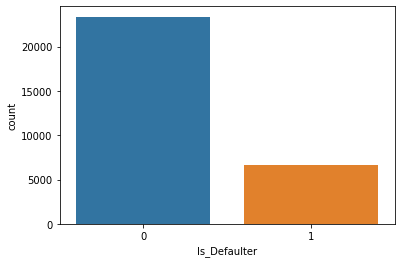

In [ ]:
# to check weather the data set is balance or not 
sns.countplot(df['Is_Defaulter'])

this data set is quite imbalance with defaulter as only 22 percent 

---
# Bivariate Analysis
---

## Sex

In [ ]:
# creating a dataframe for catagorical varibles
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','Is_Defaulter']
df_cat = df[categorical_features]

In [ ]:
# changing the lable values to understandable values
df_cat.replace({'SEX': {1 : 'Male', 2 : 'Female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

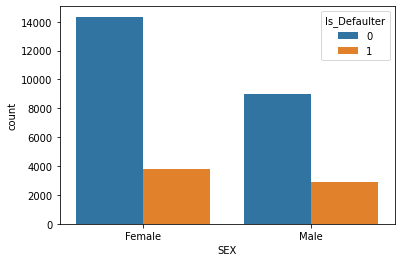

In [ ]:
sns.countplot(x = 'SEX', hue = 'Is_Defaulter', data = df_cat)

In [ ]:
# finding the percentage values of the defaulters in sex
df_sex=df_cat[['Is_Defaulter','SEX']].groupby('SEX').mean().reset_index()
df_sex['Is_Defaulter']=df_sex['Is_Defaulter']*100
df_sex

SEX  Is_Defaulter
0  Female     20.776281
1    Male     24.167227

observation
* number of women are more than number of men 
* male are more likely to default than women 

## Education

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

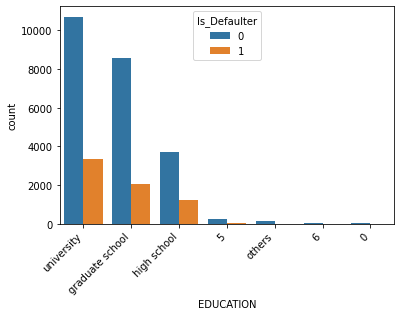

In [ ]:
sns.countplot(x = 'EDUCATION', hue = 'Is_Defaulter', data = df_cat)
plt.xticks(rotation=45,horizontalalignment='right')

In [ ]:
# replacing the values of undocumented lables to others
df_cat.replace({'EDUCATION' : {5 : 'others', 6 : 'others', 0 : 'others'}},inplace=True)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

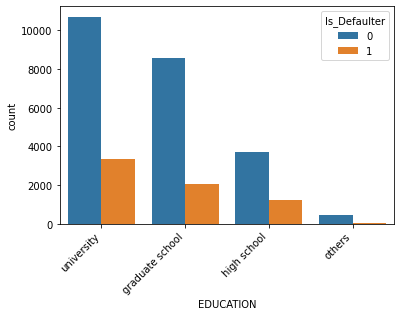

In [ ]:
sns.countplot(x = 'EDUCATION', hue = 'Is_Defaulter', data = df_cat)
plt.xticks(rotation=45,horizontalalignment='right')

In [ ]:
df_sex=df_cat[['Is_Defaulter','SEX']].groupby('SEX').mean().reset_index()
df_sex['Is_Defaulter']=df_sex['Is_Defaulter']*100
df_sex

SEX  Is_Defaulter
0  Female     20.776281
1    Male     24.167227

In [ ]:
# finding the percentage values of the defaulters in education feature
df_edu=df_cat[['Is_Defaulter','EDUCATION']].groupby('EDUCATION').mean().reset_index()
df_edu['Is_Defaulter']=df_edu['Is_Defaulter']*100
df_edu.sort_values('Is_Defaulter',ascending=False)

EDUCATION  Is_Defaulter
1      high school     25.157616
3       university     23.734854
0  graduate school     19.234766
2           others      7.051282

**Obsevation**
* category 5,6 and 0 are undocumented which might be of lower education,no education or education higher than high school we can convert them to others 
* as the eduaction increases the chances of defaulter also increaases

## Marriage

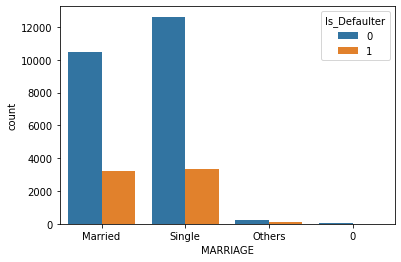

In [ ]:
sns.countplot(x = 'MARRIAGE', hue = 'Is_Defaulter', data = df_cat)

In [ ]:
# replacing the values of undocumented lables to others
df_cat.replace({'MARRIAGE' : {0 : 'Others'}},inplace=True)

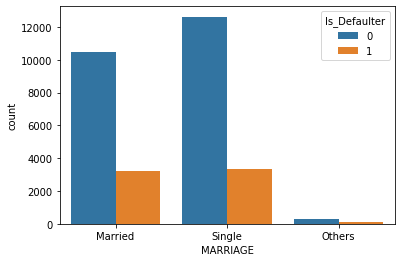

In [ ]:
sns.countplot(x = 'MARRIAGE', hue = 'Is_Defaulter', data = df_cat)

In [ ]:
# finding the percentage values of the defaulters in education feature
df_marriage=df_cat[['Is_Defaulter','MARRIAGE']].groupby('MARRIAGE').mean().reset_index()
df_marriage['Is_Defaulter']=df_marriage['Is_Defaulter']*100
df_marriage.sort_values('Is_Defaulter',ascending=False)

MARRIAGE  Is_Defaulter
1   Others     23.607427
0  Married     23.471704
2   Single     20.928339

observation
* MARRIAGE has a label 0 that is undocumented which can be converted to others
* Married and others are more likely to default 

## Age

In [ ]:
# creating a dataframe for all the numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

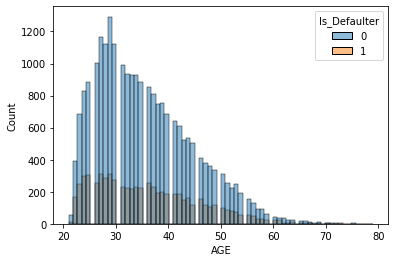

In [ ]:
sns.histplot(x='AGE', hue='Is_Defaulter',data=df_num)

In [ ]:
# grouping the age column to diffrent groups
df_num['age_group']=df_num['AGE'].apply(lambda x: age_group(x))

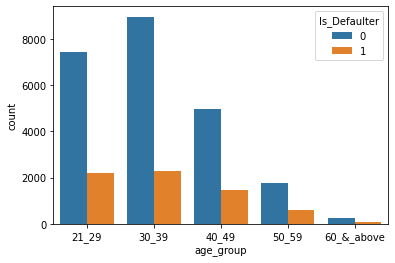

In [ ]:
sns.countplot(x=df_num['age_group'].sort_values(),data=df,hue='Is_Defaulter')

In [ ]:
# finding the percentage values of the defaulters in education feature
df_age=df_num[['Is_Defaulter','age_group']].groupby('age_group').mean().reset_index()

In [ ]:
# finding the percentage values of the defaulters in education feature
df_age=df_num[['Is_Defaulter','age_group']].groupby('age_group').mean().reset_index()
df_age['Is_Defaulter']=df_age['Is_Defaulter']*100
df_age.sort_values('Is_Defaulter',ascending=False)

age_group  Is_Defaulter
4  60_&_above     28.318584
3       50_59     24.861170
2       40_49     22.973391
0       21_29     22.842587
1       30_39     20.252714

observation
* as the age increases the number of defaulters also increases

## Pay

In [ ]:
pay_df=df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
pay_df.describe()

PAY_1         PAY_2  ...         PAY_5         PAY_6
count  30000.000000  30000.000000  ...  30000.000000  30000.000000
mean      -0.016700     -0.133767  ...     -0.266200     -0.291100
std        1.123802      1.197186  ...      1.133187      1.149988
min       -2.000000     -2.000000  ...     -2.000000     -2.000000
25%       -1.000000     -1.000000  ...     -1.000000     -1.000000
50%        0.000000      0.000000  ...      0.000000      0.000000
75%        0.000000      0.000000  ...      0.000000      0.000000
max        8.000000      8.000000  ...      8.000000      8.000000

[8 rows x 6 columns]

observation

* payment months has a label 0 that is undocumented
* -2 might mean that payment is payed before time or payed duly so we can convert this -2,-1 to 0 as payed duly

## Bill Amount

In [ ]:
bill_amt_df=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [ ]:
bill_amt_df.describe()

BILL_AMT1      BILL_AMT2  ...      BILL_AMT5      BILL_AMT6
count   30000.000000   30000.000000  ...   30000.000000   30000.000000
mean    51223.330900   49179.075167  ...   40311.400967   38871.760400
std     73635.860576   71173.768783  ...   60797.155770   59554.107537
min   -165580.000000  -69777.000000  ...  -81334.000000 -339603.000000
25%      3558.750000    2984.750000  ...    1763.000000    1256.000000
50%     22381.500000   21200.000000  ...   18104.500000   17071.000000
75%     67091.000000   64006.250000  ...   50190.500000   49198.250000
max    964511.000000  983931.000000  ...  927171.000000  961664.000000

[8 rows x 6 columns]

observation 
* -ve values can be of credit

---
# Feature engineering
---

In [ ]:
#converting the outlers to relavent labels
# replacing male(1) to 0 and female(2) to 1
df.replace({'SEX': {1 : 0, 2 : 1}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',5 : 'others', 6 : 'others', 0 : 'others',}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others', 0 :'Others'}}, inplace = True)

In [ ]:
df.EDUCATION.value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

In [ ]:
# grouping the age feature by a cousom function in group of 10
df['age_group']=df['AGE'].apply(lambda x: age_group(x))

In [ ]:
#droping the age feature 
df=df.drop('AGE',axis=1)

In [ ]:
# converting the columns to dummy variables
df = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE','age_group'])

In [ ]:
# droping the id feature as it is uniqe for each row
df=df.drop('ID',axis=1)

In [ ]:
# fetching the names of the coumns
df.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Is_Defaulter',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_Married',
       'MARRIAGE_Others', 'MARRIAGE_Single', 'age_group_21_29',
       'age_group_30_39', 'age_group_40_49', 'age_group_50_59',
       'age_group_60_&_above'],
      dtype='object')

In [ ]:
# fetching first 5 rows of the data
df.head()

LIMIT_BAL  SEX  ...  age_group_50_59  age_group_60_&_above
0      20000    1  ...                0                     0
1     120000    1  ...                0                     0
2      90000    1  ...                0                     0
3      50000    1  ...                0                     0
4      50000    0  ...                1                     0

[5 rows x 33 columns]

In [ ]:
# fetching the number of rows and columns of the data
df.shape

(30000, 33)

In [ ]:
def remove_lables (x):
  if x <=0:
    x = 0
  elif x > 3:
    x = 3
  return x

In [ ]:
# storingt the old and new names of colums  in dictionary for convertion 
PAY={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}
BILL={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}
PAY_AMT={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}

In [ ]:
# changing the names of the columns based on above dictionary
df.rename(columns=PAY,inplace=True)
df.rename(columns=BILL, inplace = True)
df.rename(columns=PAY_AMT,inplace=True)

In [ ]:
# checking for the datatypes of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int64
 2   PAY_SEPT                   30000 non-null  int64
 3   PAY_AUG                    30000 non-null  int64
 4   PAY_JUL                    30000 non-null  int64
 5   PAY_JUN                    30000 non-null  int64
 6   PAY_MAY                    30000 non-null  int64
 7   PAY_APR                    30000 non-null  int64
 8   BILL_AMT_SEPT              30000 non-null  int64
 9   BILL_AMT_AUG               30000 non-null  int64
 10  BILL_AMT_JUL               30000 non-null  int64
 11  BILL_AMT_JUN               30000 non-null  int64
 12  BILL_AMT_MAY               30000 non-null  int64
 13  BILL_AMT_APR               30000 non-null  int64
 14  PAY_AMT_SEPT          

In [ ]:
df.shape

(30000, 33)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'Is_Defaulter', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single',
       'age_group_21_29', 'age_group_30_39', 'age_group_40_49',
       'age_group_50_59', 'age_group_60_&_above'],
      dtype='object')

In [ ]:
df

LIMIT_BAL  SEX  ...  age_group_50_59  age_group_60_&_above
0          20000    1  ...                0                     0
1         120000    1  ...                0                     0
2          90000    1  ...                0                     0
3          50000    1  ...                0                     0
4          50000    0  ...                1                     0
...          ...  ...  ...              ...                   ...
29995     220000    0  ...                0                     0
29996     150000    0  ...                0                     0
29997      30000    0  ...                0                     0
29998      80000    0  ...                0                     0
29999      50000    0  ...                0                     0

[30000 rows x 33 columns]

In [ ]:
X = df.drop(['Is_Defaulter'],axis=1)
y = df['Is_Defaulter']

In [ ]:
X.shape

(30000, 32)

In [ ]:
y.shape

(30000,)

In [ ]:
df['Is_Defaulter'].value_counts()

0    23364
1     6636
Name: Is_Defaulter, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23364],
       [    1, 23364]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=0)

---
# Logestic Regrestion
---

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# converting the data to normal disrtibution
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [ ]:
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [ ]:
train_and_score(log_reg_grid, X_test_lr, X_train_lr, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.8s finished


Training time: 0.1526min
The best parameters found out to be : {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.7564254684854212 

				score matrix for train
********************************************************************************
	The accuracy is  0.8563887462192546
	The precision is  0.9439525917463945
	The recall is  0.75682637815559
	The f1 is  0.8400953137410644
	the auc  is  0.8560828710485523 

				classification report
 ******************************************************************************** 
	               precision    recall  f1-score   support

           0       0.80      0.96      0.87     17577
           1       0.94      0.76      0.84     17469

    accuracy                           0.86     35046
   macro avg       0.87      0.86      0.85     35046
weighted avg       0.87      0.86      0.85     35046



				score matrix for test
********************************************************************************

---
# Desision Tree
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.0096min
				score matrix for train
********************************************************************************
	The accuracy is  0.8197797180848029
	The precision is  0.8790185550193707
	The recall is  0.740340030911901
	The f1 is  0.8037412218010068
	the auc  is  0.81953566374633 

				classification report
 ******************************************************************************** 
	               precision    recall  f1-score   support

           0       0.78      0.90      0.83     17577
           1       0.88      0.74      0.80     17469

    accuracy                           0.82     35046
   macro avg       0.83      0.82      0.82     35046
weighted avg       0.83      0.82      0.82     35046



				score matrix for test
********************************************************************************
	The accuracy is  0.8179250128402671
	The precision is  0.8774038461538461
	The recall is  0.7430025445292621
	The f1 is  0.8046293744833288
	the a

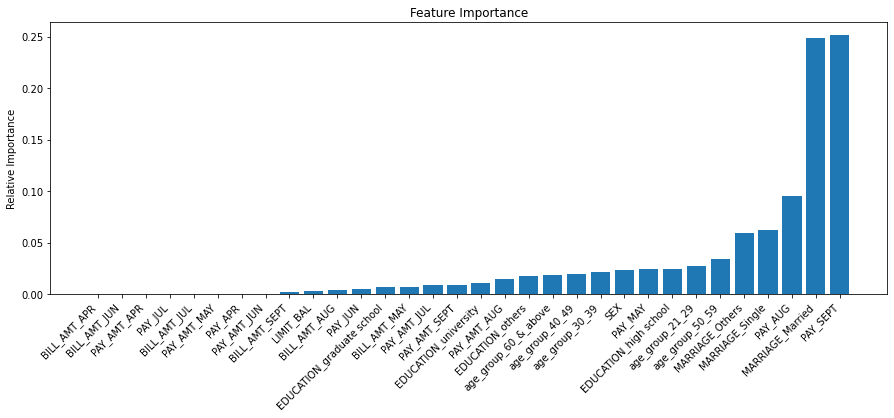

In [ ]:
feature_importances_graph(DecisionTree,'Is_Defaulter')

---
# Random forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating Random Forest Regressor model
rfc=RandomForestClassifier(n_jobs=-1,verbose=0)

In [ ]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc,X_test, X_train, y_test, y_train,best_parameter=True)

Training time: 0.1145min
				score matrix for train
********************************************************************************
	The accuracy is  0.9984021000970154
	The precision is  0.9986826278710121
	The recall is  0.9981109393783273
	The f1 is  0.9983967017865324
	the auc  is  0.9984012055940392 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17577
           1       1.00      1.00      1.00     17469

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046



				score matrix for test
********************************************************************************
	The accuracy is  0.8802431090566684
	The precision is  0.9084302325581395
	The recall is  0.8481764206955047
	The f1 is  0.8772699359592947
	the

In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)>

## implimenting grid search random forest
---

In [ ]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.8min finished


Training time: 1.9091min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
 
where negative mean squared error is:  0.8213740458015266 

				score matrix for train
********************************************************************************
	The accuracy is  0.9744906694059237
	The precision is  0.9919142204253824
	The recall is  0.9572519083969465
	The f1 is  0.974274861878453
	the auc  is  0.9746515287621503 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5787
           1       0.99      0.96      0.97      5895

    accuracy                           0.97     11682
   macro avg       0.97      0.97      0.97     11682
weighted avg       0.98      0.97      0.97     11682



				score matrix for test
****************************************************************

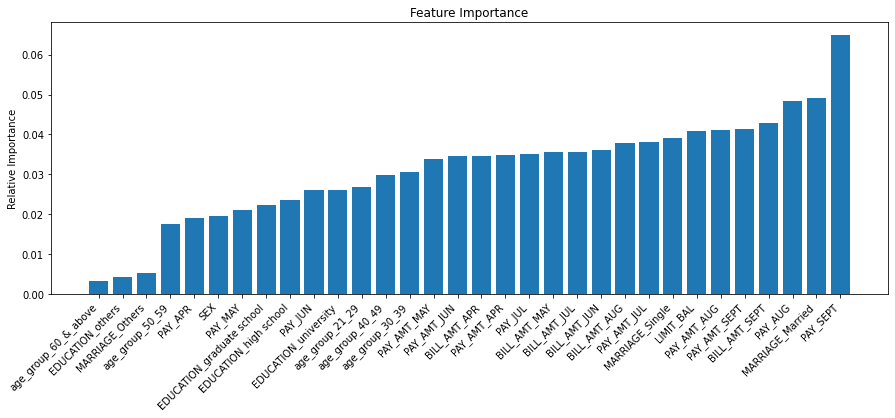

In [ ]:
feature_importances_graph(rfc_grid.best_estimator_,'Is_Defaulter')

---
#XGboost
---

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# creating XGBRegressor model
xgbc=XGBClassifier()

In [ ]:
# training and evaluating the xgb_grid
train_and_score(xgbc,X_test, X_train, y_test, y_train)

Training time: 0.0777min
				score matrix for train
********************************************************************************
	The accuracy is  0.864435313587856
	The precision is  0.9223565356004251
	The recall is  0.7949510561566203
	The f1 is  0.8539277478862414
	the auc  is  0.864221844286992 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     17577
           1       0.92      0.79      0.85     17469

    accuracy                           0.86     35046
   macro avg       0.87      0.86      0.86     35046
weighted avg       0.87      0.86      0.86     35046



				score matrix for test
********************************************************************************
	The accuracy is  0.86200992980654
	The precision is  0.9172024157412819
	The recall is  0.7986429177268872
	The f1 is  0.8538266231410955
	the auc

In [ ]:
xgbc.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

## implimenting grid search xgb
---

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  5.7min finished


Training time: 6.3997min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
 
where negative mean squared error is:  0.8232869654817104 

				score matrix for train
********************************************************************************
	The accuracy is  0.9967471323403527
	The precision is  0.9978199759049968
	The recall is  0.9956494361440266
	The f1 is  0.9967335243553008
	the auc  is  0.9967437600018079 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17577
           1       1.00      1.00      1.00     17469

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046



				score matrix for test
***************************************************************

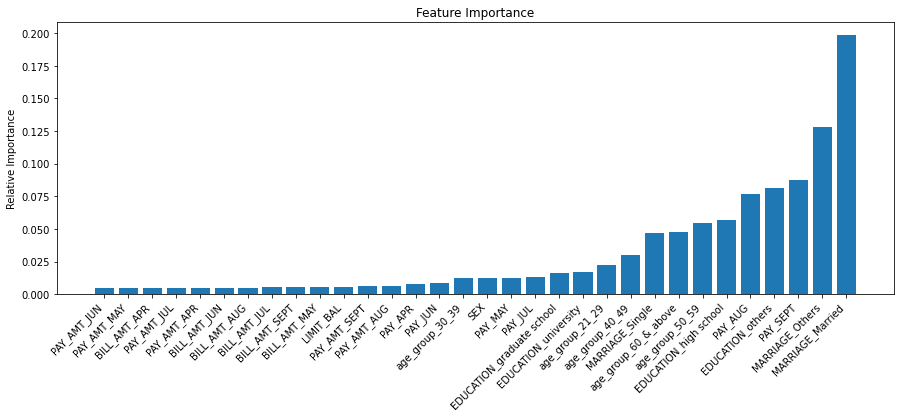

In [ ]:
feature_importances_graph(xgbc_grid.best_estimator_,'Is_Defaulter')

---
# CatBoost
---

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 24 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb_model=CatBoostClassifier(verbose=0)

In [ ]:
# training and evaluating the PolynomialFeatures
train_and_score(cb_model,X_test, X_train, y_test, y_train)

Training time: 0.24min
 
where negative mean squared error is:  {'learn': {'Logloss': 0.24249907247609473}} 

				score matrix for train
********************************************************************************
	The accuracy is  0.9001027221366205
	The precision is  0.9546875
	The recall is  0.8394298471578224
	The f1 is  0.89335648359682
	the auc  is  0.8999163231351495 

				classification report
 ******************************************************************************** 
	               precision    recall  f1-score   support

           0       0.86      0.96      0.91     17577
           1       0.95      0.84      0.89     17469

    accuracy                           0.90     35046
   macro avg       0.91      0.90      0.90     35046
weighted avg       0.91      0.90      0.90     35046



				score matrix for test
********************************************************************************
	The accuracy is  0.8733949666153056
	The precision is  0.926584234930

In [ ]:
cb_model=CatBoostClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
cat_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
cat_grid=GridSearchCV(estimator=cb_model,param_grid=cat_para,cv=3,scoring='recall',verbose=3,n_jobs=-1)

In [ ]:
# training and evaluating the PolynomialFeatures
train_and_score(cat_grid,X_test, X_train, y_test, y_train)

Learning rate set to 0.316685
0:	learn: 0.4742629	total: 2.02s	remaining: 4m 10s
1:	learn: 0.3795246	total: 3.94s	remaining: 4m 2s
2:	learn: 0.3414350	total: 5.92s	remaining: 4m
3:	learn: 0.3139564	total: 7.84s	remaining: 3m 57s
4:	learn: 0.2931139	total: 9.77s	remaining: 3m 54s
5:	learn: 0.2801094	total: 11.7s	remaining: 3m 52s
6:	learn: 0.2691822	total: 13.7s	remaining: 3m 50s
7:	learn: 0.2551206	total: 15.6s	remaining: 3m 48s
8:	learn: 0.2497641	total: 17.4s	remaining: 3m 44s
9:	learn: 0.2437182	total: 19.3s	remaining: 3m 41s
10:	learn: 0.2336275	total: 21.1s	remaining: 3m 39s
11:	learn: 0.2287761	total: 23s	remaining: 3m 36s
12:	learn: 0.2202401	total: 24.9s	remaining: 3m 34s
13:	learn: 0.2158836	total: 26.8s	remaining: 3m 32s
14:	learn: 0.2094532	total: 28.7s	remaining: 3m 30s
15:	learn: 0.2018546	total: 30.6s	remaining: 3m 28s
16:	learn: 0.1944528	total: 32.6s	remaining: 3m 26s
17:	learn: 0.1868745	total: 34.5s	remaining: 3m 25s
18:	learn: 0.1794548	total: 36.4s	remaining: 3m 23s

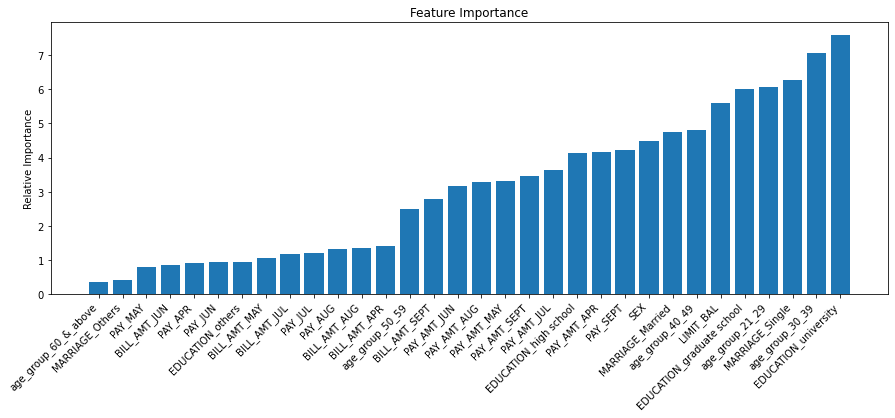

In [ ]:
feature_importances_graph(cat_grid.best_estimator_,'Is_Defaulter')

---
# lightGBM
---

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc=lgb.LGBMClassifier()

In [ ]:
# training and evaluating the lgbr_grid
train_and_score(lgbc, X_test, X_train, y_test, y_train)

Training time: 0.0189min
 
where negative mean squared error is:  defaultdict(<class 'dict'>, {}) 

				score matrix for train
********************************************************************************
	The accuracy is  0.8830108999600526
	The precision is  0.9405522968430765
	The recall is  0.8169328524815387
	The f1 is  0.8743949512897494
	the auc  is  0.8828078952058942 

				classification report
 ******************************************************************************** 
	               precision    recall  f1-score   support

           0       0.84      0.95      0.89     17577
           1       0.94      0.82      0.87     17469

    accuracy                           0.88     35046
   macro avg       0.89      0.88      0.88     35046
weighted avg       0.89      0.88      0.88     35046



				score matrix for test
********************************************************************************
	The accuracy is  0.8700564971751412
	The precision is  0.92289855072

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   22.9s finished


Training time: 0.4086min
The best parameters found out to be : {'max_depth': 10, 'n_estimators': 150}
 
where negative mean squared error is:  0.8067433739767589 

				score matrix for train
********************************************************************************
	The accuracy is  0.8915996119385949
	The precision is  0.949493620939103
	The recall is  0.8264926441124277
	The f1 is  0.8837337413925019
	the auc  is  0.8913995905320631 

				classification report
 ******************************************************************************** 
	               precision    recall  f1-score   support

           0       0.85      0.96      0.90     17577
           1       0.95      0.83      0.88     17469

    accuracy                           0.89     35046
   macro avg       0.90      0.89      0.89     35046
weighted avg       0.90      0.89      0.89     35046



				score matrix for test
********************************************************************************
	The a

In [ ]:
df

LIMIT_BAL  SEX  ...  age_group_50_59  age_group_60_&_above
0          20000    1  ...                0                     0
1         120000    1  ...                0                     0
2          90000    1  ...                0                     0
3          50000    1  ...                0                     0
4          50000    0  ...                1                     0
...          ...  ...  ...              ...                   ...
29995     220000    0  ...                0                     0
29996     150000    0  ...                0                     0
29997      30000    0  ...                0                     0
29998      80000    0  ...                0                     0
29999      50000    0  ...                0                     0

[30000 rows x 33 columns]

==========================Features Importance============================

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)  



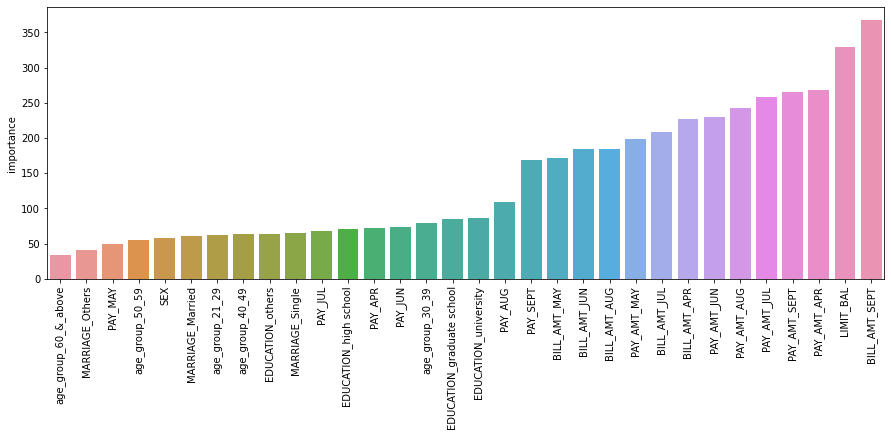

In [ ]:
get_features_importance(lgbc_grid.best_estimator_,X_train)

---
# score matrix for all the models 
---

In [ ]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score,'train_time':model_train_time}

In [ ]:
# list of all models
model_name=['Logestic Regrestion','Desision Tree','Random forest','Random forest Grid','XGboost','XGboost Grid','CATBoost','CATBoost Grid','lightGBM','lightGBM Grid']

In [ ]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [ ]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrix_df

Models  accuracy  precision  ...        f1   roc_auc  train_time
0  Logestic Regrestion  0.856874   0.940722  ...  0.843534  0.857735      0.1526
1        Desision Tree  0.817925   0.877404  ...  0.804629  0.818624      0.0096
2        Random forest  0.878189   0.906693  ...  0.875099  0.878492      0.1031
3   Random forest Grid  0.853250   0.882890  ...  0.846775  0.853128      1.7886
4              XGboost  0.862181   0.918866  ...  0.853769  0.862787      0.0816
5         XGboost Grid  0.876134   0.913844  ...  0.871595  0.876536      6.4325
6             CATBoost  0.873395   0.926584  ...  0.866408  0.873953      0.2400
7        CATBoost Grid  0.875021   0.907554  ...  0.871207  0.875370     41.1099
8             lightGBM  0.870056   0.922899  ...  0.862873  0.870615      0.0189
9        lightGBM Grid  0.870913   0.925015  ...  0.863603  0.871482      0.4086

[10 rows x 7 columns]

In [ ]:
matrix_df.train_time.sum()

50.345400000000005

# LIME
---

In [ ]:
LimeTabularExplainer_table(rfc_grid.best_estimator_,instance=2,num_features=5,dependent_var='Is_Defaulter')

In [ ]:
LimeTabularExplainer_table(xgbc_grid.best_estimator_,instance=2,num_features=5,dependent_var='Is_Defaulter')

# ROC curve for all the models
---

In [ ]:
log_reg_best=log_reg_grid.best_estimator_
DecisionTree
rfc_best=rfc_grid.best_estimator_
xgbc_best=xgbc_grid.best_estimator_
cat_best=cat_grid.best_estimator_
lgbc_best=lgbc_grid.best_estimator_


In [ ]:
y_preds_proba_lr = log_reg_best.predict_proba(X_test_lr)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_cat = cat_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dt), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (cat_best, y_preds_proba_cat),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

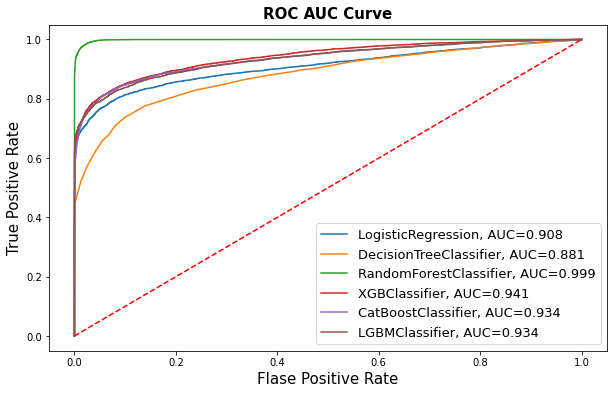

In [ ]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()